# Everymind - FireData
Neste notebook, apresentamos a descrição do processo de desenvolver um modelo preditivo de classificação capaz de identificar quais funcionários têm tendências a sair ou permanecer na empresa.

# Integrantes

*   Alexandre Fonseca de Souza
*   Bruno Otavio Bezerra de Meira
*   Filipi Enzo Siqueira Kikuchi
*   Gabriela de Morais da Silva
*   João Pedro Sartori Garcia de Alcaraz
*   Lucas Conti Pereira
*   Sofia Moreiras Pimazzoni


Primeiramente, utilizaremos o arquivo que contém a base de dados dos colaboradores para a future engineering.

#1.Preparação do algoritmo

Para nossa solução funcionar corretamente e sem erros, primeiramente precisaremos importar bibliotecas com funções e funcionalidades que agregam para o modelo preditivo. Também será feita a importação do banco de dados para análises futuras.

## 1.1 Importação de Bibliotecas

Para que o algoritmo funcione da forma desejada, primeiro instalamos e importamos funções e bibliotecas que auxiliam na execução de algumas tarefas. Todas as importações estão listadas abaixo:

In [ ]:
# Numpy
!pip install numpy
import numpy as np

# Instalando o moment
!pip install moment

# Pandas
import pandas as pd

# Scikit-learn
!pip install -U scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, linear_model, datasets, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC


# Datetime
from datetime import datetime, date

# Moment
import moment
import plotly.express as px

# Matplotlib
import matplotlib.pyplot as plt

# Graphviz
import graphviz

# Yellowbrick
from yellowbrick.classifier import ConfusionMatrix

# Oversampling
from imblearn.over_sampling import RandomOverSampler


# Pycaret
# !pip install pycaret
# import pycaret
# from pycaret.classification import setup
# from pycaret.classification import compare_models
# from pycaret.datasets import get_data
# from pycaret.utils import enable_colab
# enable_colab()
# from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.2 Importação do banco de dados

Para que o algoritmo consiga performar, precisamos importar o arquivo contendo os dados, a fim de tratá-los e posteriormente fazer analises mais acuradas. Como possuímos três tabelas com dados diferentes, separamo-nos em 3 dataframes diferentes.

In [ ]:
# Dataframe da tabela "Everymind"
df_everymind = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Everymind")

# Dataframe da tabela "Reconhecimento"
df_reconhecimento = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Reconhecimento")

# Dataframe da tabela "Reconhecimento"
df_ambiente = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Ambiente de Trabalho 27.07")

#2.Análises gráficas e compreensão dos dados

Aqui apresentaremos a descrição estatística básica dos dados, principalmente dos atributos de interesse, com inclusão de visualizações gráficas e como essas análises embasam suas hipóteses.


#3.Preparação dos Dados

A manipulação dos dados exige que eles estejam todos em formato de número (type: number) para fácil leitura e carregamento dos dados pelo algoritmo, os dados disponibilizados precisam ser passados por uma etapa de preparação. Essa etapa inclui tarefas de classificação e formatação de dados para modelagem, remover ou substituir registros em branco, seleção de um subconjunto de amostras para análise, derivação de novos atributos e mesclar conjuntos de dados e registros.

## 3.1 Remover ou substituir registros em branco

Em nosso modelo preditivo ter registros em brancos prejudica a análise do algoritmo, tendo isso em vista, detectamos que algumas colunas da aba “Everymind” e “Ambiente de Trabalho 27.07” haviam dados vazios e precisariam ser preenchidos. Essa Feature foi selecionada para os campos vazios na tabela não ocasionarem erros em nossa predição do algoritmo e prejudicar a confiabilidade das informações.

In [ ]:
#------------------------------------Tabela Everymind--------------------------

# Verifica se dentro da coluna "Dt Saisa" tem cédulas vazias e caso tenha, adiciona a data de hoje.
df_saida = df_everymind['Dt Saida'].isnull()

for i in range(0,len(df_saida)):
  if df_saida[i] == True:
    df_everymind['Dt Saida'][i] = pd.Timestamp.today()

# Verifica se dentro da coluna "Tipo Saida" tem cédulas vazias e caso tenha, adciona "ColaboradorAtivo".

df_tipo_bool = df_everymind['Tipo Saida'].isnull()
df_tipo_aux = df_everymind['Tipo Saida']

for i in range(0,len(df_tipo_bool)):
  if df_tipo_bool[i] == True:
    df_tipo_bool[i] = "ColaboradorAtivo"
  if df_tipo_bool[i] == False: 
    df_tipo_bool[i] = (df_tipo_aux[i])

df_everymind['Tipo Saida'] = df_tipo_bool

#------------------------------------Tabela Ambiente de trabalho--------------------------

# Verifica se dentro das colunas de porcentagem de satisfação tem cédulas vazias e caso tenha, adiciona o 0.
keywords = ['Pulou', 'Muito Insatisfeito', 'Insatisfeito', 'Neutro', 'Satisfeito', 'Muito Satisfeito']

for i in keywords:
  
  df_ambiente_satisfaction = df_ambiente[i].isnull()

  for j in range(0,len(df_ambiente_satisfaction)):
    if df_ambiente_satisfaction[j] == True:
      df_ambiente[i][j] = "0"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 3.2 Classificação e formatação de dados para modelagem

Nesta seção, vamos tratar os dados a fim de padronizá-los para que sejam aceitos e melhor utilizados pelo algoritmo a partir de funções que modificam a forma do dado. No momento, estamos trabalhando com alguns tipos de dados, sendo eles:


*   Dados relacionadas a tempo e numeros
*   Dados relaciondados a nome

### 3.2.1 Dados relacionadas a tempo e numeros

As manipulações para dados do tipo data envolvem a conversão do formato para o padrão "YYYY-MM-DD" (Ex: 2020-09-14) e a inclusão de valores em cédulas vazias para efeitos de cálculo (Na coluna "Dt Saida", quando não consta a data de saída, atribuimos o dia atual para podermos calcular o número de dias na empresa). Sofrem essa alteração os dados presentes nas colunas "Dt Admissao", "Dt Nascimento" e "Dt Saida".

As manipulações dos dados das respostas da pesquisa de ambiente de trabalho da ultima tabela apenas inclui a remoção do "%" para o dado ser apenas numerico.

As transformações seguem abaixo:

In [ ]:
#------------------------------------Tabela Everymind--------------------------

# Formata a data de admissao no formato ano/mes/dia
for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]) .replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

df_everymind['Dt Admissao'] = pd.to_datetime(df_everymind['Dt Admissao'], format="%Y/%m/%d")

# Formata a data de nascimento no formato ano/mes/dia

for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")
  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")

df_everymind['Dt Nascimento'] = pd.to_datetime(df_everymind['Dt Nascimento'], format="%Y/%m/%d")


# Formata a data de saída, sendo que se o valor for vazio, atribui a data atual como data de saída

df_everymind['Dt Saida'] = pd.to_datetime(df_everymind['Dt Saida'], format="%Y/%m/%d")

#------------------------------------Tabela Reconhecimento--------------------------

# Coloca a coluna "Data de Admissao" no formato ano/mes/dia

for i in range(0, len(df_reconhecimento['Data de Admissão'])):

  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('00:00:00', '')
  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('/', '-')
  df_reconhecimento['Data de Admissão'][i] = moment.date(df_reconhecimento['Data de Admissão'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data de Admissão'] = pd.to_datetime(df_reconhecimento['Data de Admissão'], format="%Y/%m/%d")

# Formata a data de Vigência no formato ano/mes/dia
for i in range(0, len(df_reconhecimento['Data Vigência'])):
  
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('00:00:00', '')
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('/', '-')
  df_reconhecimento['Data Vigência'][i] = moment.date(df_reconhecimento['Data Vigência'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data Vigência'] = pd.to_datetime(df_reconhecimento['Data Vigência'], format="%Y/%m/%d")


#------------------------------------Tabela Ambiente de trabalho--------------------------


for i in keywords:
  for j in range(0,len(df_ambiente[i])):
    df_ambiente[i][j] = df_ambiente[i][j].replace('%', '')
  df_ambiente[i] = df_ambiente[i].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

### 3.2.2 Variáveis relacionadas a nomes

Para que o programa funcione corretamente, todos os dados que contêm nomes e/ou informações baseadas em texto foram padronizados removendo todos os espaços em branco (Exemplo: "Funcional Pl" vira "FuncionalPl").

foram formatados os textos com o objetivo de permanecer apenas os números. Exemplo: “PessoaColaboradora197” foi formatado para apenas “197”. Sofrem essa alteração os dados presentes na aba “Everymind”  nas coluna “Nome Completo” e na aba “Reconhecimento” na coluna “Codinome”.

As transformações seguem abaixo:

In [ ]:
# ------------------------------------Tabela Everymind--------------------------


# Pega todas as colunas do dataframe com type "object" e tira todos os espaços em branco
dtg = df_everymind.select_dtypes(include = "object").columns

for j in dtg:
  df_everymind[j] = df_everymind[j].str.replace(' ', '')

for i in df_everymind:
  df_everymind[j] = df_everymind[j].str.replace('-', '')
# Cria uma coluna nova

df_everymind['PessoaColaboradora'] = ""

# Pega a coluna "Nome completo" tira o texto, deixa apenas o número do colaborador e adiciona na coluna criada "PessoaColaboradora" 

for i in range(0, len(df_everymind['Nome Completo'])):
  df_everymind['PessoaColaboradora'][i] = str(df_everymind['Nome Completo'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Reconhecimento--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_reconhecimento_types = df_reconhecimento.select_dtypes(include = "object").columns

for j in df_reconhecimento_types:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace(' ', '')

for i in df_reconhecimento:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace('-', '')

# Cria uma nova coluna "Pessoa colaboradora"
df_reconhecimento['PessoaColaboradora'] = ""

# Transforma a coluna "Codinome" em number, tirando os textos e colocando o numero do colaborador na coluna "PessoaColaboradora"
for i in range(0, len(df_reconhecimento['Codinome'])):
  df_reconhecimento['PessoaColaboradora'][i] = str(df_reconhecimento['Codinome'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Ambiente de Trabalho 27.07--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_ambiente_types = df_ambiente.select_dtypes(include = "object").columns

for j in df_ambiente_types:
  df_ambiente[j] = df_ambiente[j].str.replace(' ', '')

for i in df_ambiente:
  df_ambiente[j] = df_ambiente[j].str.replace('-', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.3 Derivação de novos atributos

A partir da limpeza dos dados e do relacionamento entre eles, conseguimos gerar novos elementos que facilitam as analises e auxiliam na tomada de decisões da IA. A partir dos dados obtidos, obtivemos os seguintes atributos:



*   Número de dias na empresa
*   Idade do colaborador
*   Média do tempo de reconhecimento (Também se aplica aos que tem mais de um reconhecimento).
*   Informação de trabalho remoto
*   Informação de saída ou permanência do colaborador na empresa





In [ ]:
# ------------------------------------Tabela Everymind--------------------------

# Função que calcula os dias entre duas datas
def numOfDays(date1, date2):
    return (date2-date1).days

# Cria uma coluna de idade e uma de numero de dias na empresa na empresa 
df_everymind['Idade'] = 0
df_everymind['NumeroMeses'] = 0

# Faz o calculo da idade e armazena 
for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == str('ColaboradorAtivo'):
    if date.today().month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (date.today().year - (df_everymind['Dt Nascimento'][i]).year)-1
  else:
    if df_everymind['Dt Saida'][i].month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Nascimento'][i].year)-1

# Faz o calculo do numero de meses na empresa de cada colaborador

for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == str('Ativo'):
    df_everymind['NumeroMeses'][i] = (((date.today().year - df_everymind['Dt Admissao'][i].year)*12)+date.today().month - df_everymind['Dt Admissao'][i].month)
  else:
    df_everymind['NumeroMeses'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Admissao'][i].year)*12+df_everymind['Dt Saida'][i].month - df_everymind['Dt Admissao'][i].month
    
# ------------------------------------Tabela Reconhecimento--------------------------


#Cria uma coluna "DiasParaReconhecimento"
df_reconhecimento['DiasParaReconhecimento'] = 0

#Calcula os dias que o empregador entrou na empresa até receber reconhecimento
date_reconhecimento1 = df_reconhecimento['Data de Admissão']
date_reconhecimento2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date_reconhecimento2)):
  df_reconhecimento['DiasParaReconhecimento'][i] = str(numOfDays(date_reconhecimento1[i], date_reconhecimento2[i]))


# ------------------------------------Integração tabela Everymind e Reconhecimento--------------------------


# Cálculo do media do tempo para reconhecimento

df_reconhecimento['Espera de promoção'] = ""
df_everymind['mediaTempoPromoção'] = 0

date1 = df_reconhecimento['Data de Admissão']
date2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date2)):
  df_reconhecimento['Espera de promoção'][i] = str(numOfDays(date1[i], date2[i]))

arrayColab = df_reconhecimento['PessoaColaboradora'].unique()

wait_days_test = []
mean_time = []

for i in df_reconhecimento['PessoaColaboradora'].unique():
  wait_days_test.append(df_reconhecimento.loc[df_reconhecimento['PessoaColaboradora'] == i]['Espera de promoção'].values.tolist())
  wait_days_test[-1] = list(map(int, wait_days_test[-1]))

for i in range(0,len(wait_days_test)):
  wait_days_test[i] = np.sort(wait_days_test[i]).tolist()

for i in range(0, len(wait_days_test)):
  mean_time_calculation = 0
  for j in range(len(wait_days_test[i])-1, 0, -1):
    wait_days_test[i][j] = wait_days_test[i][j]-wait_days_test[i][j-1]
    mean_time_calculation += wait_days_test[i][j]
  mean_time.append(mean_time_calculation+wait_days_test[i][0]/len(wait_days_test[i]))

placeholder = df_reconhecimento['PessoaColaboradora'].unique()
for i in range (0, len(placeholder)):
  df_everymind.loc[df_everymind.PessoaColaboradora == placeholder[i], 'mediaTempoPromoção'] = mean_time[i]
for i in range (0, len(df_everymind['mediaTempoPromoção'])):
  print(str(df_everymind["PessoaColaboradora"][i]) + " " + str(df_everymind['mediaTempoPromoção'][i]))


# Criação da coluna que mostra a informação de saída ou permanência do colaborador na empresa

df_everymind['Saiu'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Saiu'][i] = 0
  else:
    df_everymind['Saiu'][i] = 1

# Criação da coluna que mostra a informação de trabalho remoto

df_everymind['Remoto'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Cidade'][i] != "SãoPaulo" and df_everymind['Estado'][i] != "SP":
    df_everymind['Remoto'][i] = 1
  else:
    df_everymind['Remoto'][i] = 0

print("------------------------------------------------------------------------------")

# Criação da coluna que mostra a informação do colaborador ser ou não dev

columAux = df_everymind["Cargo"]
df_everymind['DEV'] = 0

for i in range(0, len(df_everymind["Cargo"])):
  df_everymind["Cargo"][i] = df_everymind["Cargo"][i].upper()
  print(i, "-", df_everymind["Cargo"][i].find('DEV'))
  if df_everymind["Cargo"][i].find('DEV') != -1:
    df_everymind['DEV'][i] = 1
  else:
    df_everymind['DEV'][i] = 0


# Criação da coluna que mostra a informação do colaborador estar ou não estar acima da faixa salarial
df_everymind['mediaSalarial'] = 0

for i in range (0, len(df_everymind['Salario Mês'])):
  if df_everymind['Salario Mês'][i] >= df_everymind['Salario Mês'].mean():
    df_everymind['mediaSalarial'][i] = 1
  else:
    df_everymind['mediaSalarial'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: Settin

1 0.0
10 137.0
100 0.0
101 427.33333333333337
102 0.0
103 151.0
104 0.0
105 0.0
106 638.3333333333334
107 0.0
108 228.33333333333334
109 0.0
11 0.0
110 0.0
111 0.0
112 0.0
113 486.0
114 0.0
115 134.0
116 365.0
117 265.0
118 439.0
119 241.5
12 0.0
120 302.0
121 0.0
122 891.6
123 0.0
124 0.0
125 325.0
126 0.0
127 419.0
128 0.0
129 0.0
13 0.0
130 243.0
131 179.0
132 0.0
133 0.0
134 669.3333333333334
135 0.0
136 0.0
137 626.0
138 0.0
139 0.0
14 750.5714285714286
140 0.0
141 0.0
142 0.0
143 0.0
144 0.0
145 243.0
146 223.5
147 0.0
148 340.5
149 0.0
15 314.5
150 0.0
151 0.0
152 0.0
153 0.0
154 0.0
155 0.0
156 0.0
157 363.5
158 0.0
159 0.0
16 303.0
160 0.0
161 343.0
162 715.0
163 0.0
164 0.0
165 466.0
166 0.0
167 339.5
168 307.5
169 463.5
17 0.0
170 0.0
171 659.3333333333334
172 0.0
173 0.0
174 0.0
175 0.0
176 0.0
177 0.0
178 0.0
179 0.0
18 0.0
180 0.0
181 0.0
182 0.0
183 0.0
184 0.0
185 448.0
185 448.0
186 0.0
187 0.0
188 793.75
189 172.0
19 0.0
190 176.0
191 0.0
192 150.0
193 0.0
194 0.0
195

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to

------------------------------------------------------------------------------
0 - 0
1 - 0
2 - 0
3 - 0
4 - -1
5 - -1
6 - 0
7 - 0
8 - 0
9 - 0
10 - 0
11 - 0
12 - 0
13 - -1
14 - 0
15 - 0
16 - -1
17 - 8
18 - 8
19 - 0
20 - -1
21 - -1
22 - -1
23 - 0
24 - 0
25 - 0
26 - 0
27 - 0
28 - 0
29 - -1
30 - 0
31 - -1
32 - -1
33 - -1
34 - 0
35 - -1
36 - -1
37 - 0
38 - 0
39 - 0
40 - 0
41 - 0
42 - 0
43 - 0
44 - -1
45 - -1
46 - -1
47 - 0
48 - 0
49 - -1
50 - 0
51 - 0
52 - -1
53 - -1
54 - -1
55 - 0
56 - -1
57 - 0
58 - 0
59 - 0
60 - 0
61 - 0
62 - -1
63 - 0
64 - -1
65 - 0
66 - -1
67 - 0
68 - -1
69 - 0
70 - 0
71 - 0
72 - 0
73 - -1
74 - 0
75 - 0
76 - -1
77 - -1
78 - 0
79 - 0
80 - -1
81 - -1
82 - 0
83 - -1
84 - -1
85 - 8
86 - -1
87 - -1
88 - 0
89 - 0
90 - 0
91 - 0
92 - 0
93 - 0
94 - -1
95 - 0
96 - -1
97 - -1
98 - 0
99 - 0
100 - 0
101 - 0
102 - -1
103 - -1
104 - 0
105 - 0
106 - 0
107 - 0
108 - 0
109 - 0
110 - 0
111 - -1
112 - 0
113 - -1
114 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


- -1
115 - -1
116 - -1
117 - -1
118 - 0
119 - 0
120 - -1
121 - 0
122 - -1
123 - 0
124 - 8
125 - 8
126 - -1
127 - 0
128 - 0
129 - 0
130 - -1
131 - 0
132 - 0
133 - 0
134 - 0
135 - 0
136 - 0
137 - 0
138 - 0
139 - 0
140 - -1
141 - 0
142 - -1
143 - 0
144 - -1
145 - -1
146 - 0
147 - -1
148 - 0
149 - -1
150 - 0
151 - -1
152 - -1
153 - 0
154 - -1
155 - -1
156 - 0
157 - 8
158 - 0
159 - 0
160 - 0
161 - 8
162 - -1
163 - 8
164 - 0
165 - 8
166 - 8
167 - 8
168 - 8
169 - 8
170 - 0
171 - 0
172 - 0
173 - 0
174 - -1
175 - 0
176 - 0
177 - -1
178 - -1
179 - 0
180 - 0
181 - 0
182 - -1
183 - 0
184 - -1
185 - 8
186 - 8
187 - 0
188 - -1
189 - 0
190 - 8
191 - -1
192 - -1
193 - -1
194 - -1
195 - -1
196 - 0
197 - -1
198 - 0
199 - 0
200 - -1
201 - 0
202 - 0
203 - -1
204 - 0
205 - 0
206 - 0
207 - 0
208 - -1
209 - 0
210 - -1
211 - -1
212 - -1
213 - -1
214 - -1
215 - -1
216 - -1
217 - 0
218 - -1
219 - -1
220 - 0
221 - 0
222 - 0
223 - -1
224 - -1
225 - -1
226 - -1
227 - -1
228 - 0
229 - -1
230 - 0
231 - 0
232 - -1
23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.4 Encoders

Grande parte dos dados são categóricos e quando temos categorias como descrição do dado precisamos converter para valores numéricos (tipo int e float). Existem duas maneiras de se fazer o "encoding", sendo elas:
*   Label Encoding
*   One Hot Encoding



### 3.4.1 Label Encoding

O Label Encoding transforma as features em números ordenados, ou seja, em ordem. É normalmente usada quando uma feature é mais importante que outra. No projeto a única que identificamos que possui ordem é a escolaridade (na tabela Everymind).

In [ ]:
# Cria um novo Data Frame para a coluna de Escolaridade e raliza o processo de Label Encoding
data_frame_esco = pd.DataFrame(df_everymind, columns=["Escolaridade "]) 
df_esco_atual = data_frame_esco.replace(['EnsinoMédioIncompleto',
                                         'EnsinoMédio', 
                                         'Técnico', 
                                         'Superiorincompleto', 
                                         'Graduação', 
                                         'PósGraduação', 
                                         'Mestrado'], 
                                         [0,1,2,3,4,5,6])

### 3.4.2 One Hot Encoding

O One Hot Encoding cria uma coluna para cada valor e faz uma atribuição do valor 1 (um) para a coluna correspondente da amostra e 0 (zero) para as outras. Dessa forma, uma linha tem apenas um valor. Essa forma de encoding costuma ser mais utilizada, pois não atribui uma ordem às features. Nós usamos o One Hot Encoding em todas as tabelas.

In [ ]:
# ------------------------------------Tabela Everymind--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada. 
one_hot_cargos = pd.get_dummies(df_everymind["Cargo"])
one_hot_saida = pd.get_dummies(df_everymind["Tipo Saida"])
one_hot_genero = pd.get_dummies(df_everymind["Genero"])
one_hot_etnia = pd.get_dummies(df_everymind["Etnia"])
one_hot_civil = pd.get_dummies(df_everymind["Estado Civil"]) 
one_hot_estado = pd.get_dummies(df_everymind["Estado"])
one_hot_cidade = pd.get_dummies(df_everymind["Cidade"])
one_hot_area = pd.get_dummies(df_everymind["Area"])
one_hot_colaborador = pd.get_dummies(df_everymind["PessoaColaboradora"])


# ------------------------------------Tabela Reconhecimento--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada. 
one_hot_codinome = pd.get_dummies(df_reconhecimento["Codinome"])
one_hot_situacao = pd.get_dummies(df_reconhecimento["Situação"])
one_hot_novocargo = pd.get_dummies(df_reconhecimento["Novo Cargo"])
one_hot_motivo = pd.get_dummies(df_reconhecimento["Motivo"])
one_hot_funcao = pd.get_dummies(df_reconhecimento["Alterou Função"])

# ------------------------------------Tabela Ambiente de trabalho--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada.
one_hot_div = pd.get_dummies(df_ambiente["Divisao"])
one_hot_pilar = pd.get_dummies(df_ambiente["Pilar"])
one_hot_factor = pd.get_dummies(df_ambiente["Fator"])
one_hot_question = pd.get_dummies(df_ambiente["Pergunta"])
one_hot_reliabilityRate = pd.get_dummies(df_ambiente["Taxa de Confiabilidade"])

## 3.5 Colunas não utilizadas

Nesta etapa foi feita uma seleção dos dados e definição da relevância do atributo no nosso modelo, um atributo observado foi a questão da etnia, usar isso no modelo como fator decisivo é antiético, cria um viés negativo, deixa o modelo questionável com nível baixo de credibilidade e tira a viabilidade da solução, pensando nisso foi restringido da análise a coluna contendo a etnia dos colaboradores já que não tem validade para o resultado e não faz sentido para o negócio.

In [ ]:
df_everymind = df_everymind.drop(columns=['Etnia'])

## 3.6 Mesclar conjuntos de dados e registros

Ao fim da formatação, categorização e padronização do banco de dados, todas as informações foram transferidos para uma nova tabela em que o algoritmo poderá trabalhar com ela no backend e que facilita a verificação e análise dos novos dados. Foi criada uma nova tabela correspondente para cada aba da base de dados.

### 3.6.1 Armazenando os dados em variaveis

In [ ]:
# ------------------------------------Tabela Everymind--------------------------

age = df_everymind['Idade']
companyTime = df_everymind['NumeroMeses']
monthlySalary = df_everymind['Salario Mês']

# ------------------------------------Tabela Reconhecimento--------------------------

registrationRecognition = df_reconhecimento['Matricula']
registrationRecognition = df_reconhecimento['PessoaColaboradora']
daysRecognition = df_reconhecimento['DiasParaReconhecimento']
newSalary =  df_reconhecimento['Novo Salario']

# ------------------------------------Tabela Ambiente de trabalho--------------------------

punctuation = df_ambiente['Pontuação']
subpunctuation = df_ambiente['Pontuação.1']
searchSkip = df_ambiente['Pulou']
veryUnsatisfied = df_ambiente['Muito Insatisfeito']
unsatisfied = df_ambiente['Insatisfeito']
neutral = df_ambiente['Neutro']
satisfied = df_ambiente['Satisfeito']
verySatisfied = df_ambiente['Muito Satisfeito']

### 3.6.2 Concatenando os dados na nova tabela

In [ ]:
# ------------------------------------Tabela Everymind--------------------------

# Cria uma tabela nova com os dados formatados
newData = pd.DataFrame()
newData = pd.concat([newData,age], axis = 1)
newData = pd.concat([newData,companyTime], axis = 1)
newData = pd.concat([newData,one_hot_cargos], axis = 1)
newData = pd.concat([newData,monthlySalary], axis = 1)
newData = pd.concat([newData,one_hot_genero], axis = 1)
newData = pd.concat([newData,one_hot_civil], axis = 1)
newData = pd.concat([newData,df_esco_atual], axis = 1)
newData = pd.concat([newData,one_hot_estado], axis = 1)
newData = pd.concat([newData,one_hot_cidade], axis = 1)
newData = pd.concat([newData,one_hot_area], axis = 1)

# ------------------------------------Tabela Reconhecimento--------------------------

# Cria uma tabela nova com os dados formatados
newData_reconhecimento = pd.DataFrame()
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_codinome], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_situacao], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_novocargo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_motivo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_funcao], axis = 1)


# ------------------------------------Tabela Reconhecimento--------------------------

# Cria uma tabela nova com os dados formatados
newData_ambiente = pd.DataFrame()
newData_ambiente = pd.concat([newData_ambiente,one_hot_div], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_pilar], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,punctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_factor], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,subpunctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_question], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,searchSkip], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,veryUnsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,unsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,neutral], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,satisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,verySatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_reliabilityRate], axis = 1)

### 3.6.3 Download das novas tabelas

In [ ]:
# newData.to_excel('formatData_Everymind.xlsx')
# newData_reconhecimento.to_excel('formatData_Reconhecimento.xlsx')
# newData_ambiente.to_excel('formatData_Ambiente.xlsx')

#4.Definição das Features

Após todo o processo de preparação dos dados é necessário concatenar os novos dados em um novo Database para ser utilizado no treinamento e teste dos modelos preditivos.

In [ ]:
# # Primeira definição de Features
# features = pd.DataFrame()
# features = pd.concat([features ,df_everymind['Idade']], axis = 1)
# features = pd.concat([features ,df_everymind['NumeroMeses']], axis = 1)
# features = pd.concat([features ,df_everymind['Salario Mês']], axis = 1)
# # features = pd.concat([features ,one_hot_cargos], axis = 1)
# features = pd.concat([features ,one_hot_genero], axis = 1)
# features = pd.concat([features ,one_hot_civil], axis = 1)
# features = pd.concat([features ,one_hot_area], axis = 1)
# features = pd.concat([features ,df_everymind['Remoto']], axis = 1)
# features = pd.concat([features ,df_everymind['mediaTempoPromoção']], axis = 1)
# features = pd.concat([features ,df_everymind['DEV']], axis = 1)
# # features = pd.concat([features ,df_everymind['mediaSalarial']], axis = 1)

features = pd.DataFrame()
features = pd.concat([features ,df_everymind['Idade']], axis = 1)
features = pd.concat([features ,df_everymind['NumeroMeses']], axis = 1)
features = pd.concat([features ,df_everymind['Salario Mês']], axis = 1)
features = pd.concat([features ,one_hot_cargos], axis = 1)
features = pd.concat([features ,one_hot_genero], axis = 1)
features = pd.concat([features ,one_hot_civil], axis = 1)
features = pd.concat([features ,one_hot_area], axis = 1)
features = pd.concat([features ,df_everymind['Remoto']], axis = 1)
features = pd.concat([features ,df_everymind['mediaTempoPromoção']], axis = 1)



# Segunda definição de Features
features2 = pd.DataFrame()
features2 = pd.concat([features2,df_everymind['Idade']], axis = 1)
features2 = pd.concat([features2,df_everymind['NumeroMeses']], axis = 1)
features2 = pd.concat([features2,one_hot_cargos], axis = 1)
features2 = pd.concat([features2,df_everymind['Salario Mês']], axis = 1)
features2 = pd.concat([features2,one_hot_genero], axis = 1)
features2 = pd.concat([features2,one_hot_civil], axis = 1)
features2 = pd.concat([features2,df_esco_atual], axis = 1)
features2 = pd.concat([features2,one_hot_area], axis = 1)
features2 = pd.concat([features2,df_everymind['mediaTempoPromoção']], axis = 1)
features2 = pd.concat([features2,df_everymind['Remoto']], axis = 1)

# Terceira definição de Features
features3 = pd.DataFrame()
features3 = pd.concat([features3,df_everymind['Salario Mês']], axis = 1)
features3 = pd.concat([features3,df_everymind['Idade']], axis = 1)
# features3 = pd.concat([features3,df_everymind['mediaTempoPromoção']], axis = 1)
features3 = pd.concat([features3,df_everymind['NumeroMeses']], axis = 1)
features3 = pd.concat([features3,df_everymind['Remoto']], axis = 1)
features3 = pd.concat([features3,df_esco_atual], axis = 1)

#5.Modelagem

Nessa seção iremos explicar o funcionamento de cada um dos algoritmos e os experimentos realizados com os algoritmos (treinamentos e testes), usando equações, tabelas e gráficos de visualização de dados. Os algoritmos utilizados estão listados a seguir:



*   K Nearest Neighbor
*   Naive Bayes
*   Árvore de decisão
*   RandomForest
*   Support Vector Machine
*   Regressão Logística

Em conjunto com os experimentos realizados também contém os resultados de cada algoritmo, com uma conclusão ao final.

## 5.1 K Nearest Neighbor

O KNN é um algoritmo não paramétrico, onde a estrutura do modelo será determinada pelo dataset utilizado, ou seja, o conjunto de dados será determinado de acordo com a distância dos “vizinhos” mais próximos. Este algoritmo também é conhecido como de aprendizado lento ou melhor dizendo, é um algoritmo com um tempo de resposta mais demorado quando comparado aos demais, que também utilizam aprendizado supervisionado. Além disso, utiliza várias métricas para o cálculo da distância entre N dimensões, como o caso das distâncias de Hamming, Mahalanobis e Minkowski, porém a que utilizamos é a distância Euclidiana.

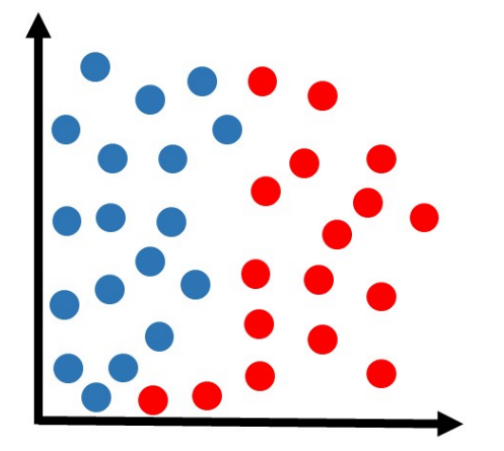

### 5.1.1 Aplicação do modelo

In [ ]:
# Dividindo x e y
x_knn = features
y_knn = df_everymind[['Saiu']]

# Dividindo dados para treino e dados para teste
x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [ ]:
# Instaciando o objeto scaler
scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_knn_train = scaler.fit_transform(x_knn_train)

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_knn_test = scaler.transform(x_knn_test)

In [ ]:
# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=9)
# Treino # x = Features, y = Label/Target
knn.fit( x_knn_train, y_knn_train.squeeze() ) # squeeze() -> df para series

# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', knn.score( x_knn_train, y_knn_train ))
print('Acuracidade (teste): ', knn.score( x_knn_test, y_knn_test ))
# realizando predições com o conjunto de teste
y_knn_pred = knn.predict(x_knn_test)
# probabilidade de cada classe
y_knn_prob = knn.predict_proba(x_knn_test)

Acuracidade (treino):  0.7078313253012049
Acuracidade (teste):  0.6293706293706294


### 5.1.2 Criação de visualização da matriz de confusão

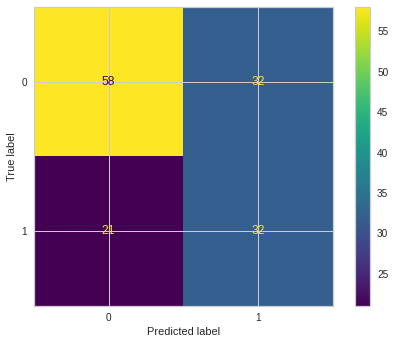

In [ ]:
# Matriz de confusão
y_knn_true = y_knn_test

cm_knn = confusion_matrix(y_knn_true, y_knn_pred)

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

### 5.1.3 Reporte das métricas de classificação

In [ ]:
# Report de classificação
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.69        90
           1       0.50      0.60      0.55        53

    accuracy                           0.63       143
   macro avg       0.62      0.62      0.62       143
weighted avg       0.65      0.63      0.63       143



## 5.2 Naive Bayes

O algoritmo Naive Bayes é um classificador probabilístico que usa o Teorema de Bayes para categorizar textos baseado na frequência das palavras usadas. O modelo desconsidera as correlações entre as features, cria uma tabela de probabilidade (fórmula abaixo) e calcula a partir dela o que tem maior chance de ocorrer.


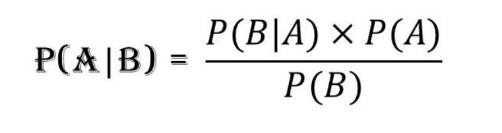

### 5.2.1 Aplicação do modelo

In [ ]:
x_by = features
y_by = df_everymind[['Saiu']]

# Aplicação do oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_by_resampled, y_by_resampled = ros.fit_resample(x_by, y_by)

# Dividimos entre tabela de treino e de teste

x_by_treino, x_by_teste, y_by_treino, y_by_teste = train_test_split(x_by_resampled, y_by_resampled, test_size = 0.3, random_state = 1)

# Analisamos o tamanho das tabelas criadas

x_by_teste.shape, y_by_teste.shape, x_by_treino.shape, y_by_treino.shape

# Instanciamos o GaussianNB, que possibilita a aplicação do Bayes, para uso na tabela de teste
naive_tipo_saida = GaussianNB()
naive_tipo_saida.fit(x_by_teste, y_by_teste)

previsoes = naive_tipo_saida.predict(x_by_teste)

# Cálculamos a acurácia
accuracy_score(y_by_teste, previsoes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7076023391812866

In [ ]:
print(classification_report(y_by_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        82
           1       0.65      0.93      0.77        89

    accuracy                           0.71       171
   macro avg       0.76      0.70      0.69       171
weighted avg       0.75      0.71      0.69       171



### 5.2.2 Criação de visualização da matriz de confusão

In [ ]:
# Fazemos a matriz de confusão
confusion_matrix(y_by_teste, previsoes)

array([[38, 44],
       [ 6, 83]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


0.7076023391812866

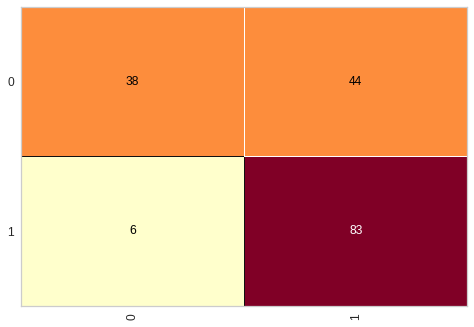

In [ ]:
cm = ConfusionMatrix(naive_tipo_saida)
cm.fit(x_by_treino, y_by_treino)
cm.score(x_by_teste, y_by_teste)

# Usamos o yellowbrick classifier para ter uma matriz de confusão mais didática 

## 5.3 Árvore de decisão

A Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado para classificação e para regressão, o algoritmo divide as variáveis em ramos, esses ramos são calculados conforme a entropia ("confusão" dos dados) e ganho de informação de cada variável (baseado na importância da variável), também é aplicado uma hierarquia na relação desses ramos, existe o nó-raiz e o nós-folha sendo o nó-raiz um dos atributos da base de dados e os nós folhas a classe ou valor que será gerado como resposta.

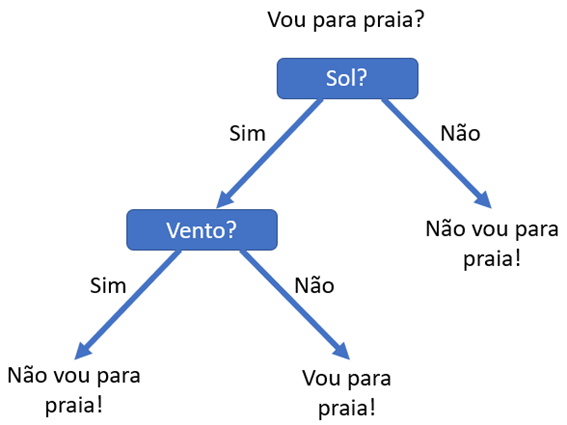





### 5.3.1 Aplicação do modelo

Nessa célula é feita a separação de treino e teste e aplica no modelo, e de saída retorna o tamanho das features (x) de treino e teste e a resposta target(y) de treino e teste. 

In [ ]:
# Definindo X (Feaures utilizadas) e Y (Resposta de Saída ou Permanencia em SIM(1) ou NÃO(0))
x_tree = features
y_tree = df_everymind[['Saiu']]

# Separa treino e teste, definindo porcentagem de separação e random_state
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, 
                                                    test_size = 0.3, 
                                                     random_state = 42)

# Mostra os tamanhos do X e Y de treino e teste
print("Tamanho do X treino:", x_train_tree.shape)
print("Tamanho do Y treino:", y_train_tree.shape)
print("Tamanho do X teste:", x_test_tree.shape)
print("Tamanho do Y teste:", y_test_tree.shape)

# Rodando o modelo de Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train_tree, y_train_tree.squeeze())


# Mostrando o resultado do modelo
print('Acuracidade (treino): ', dt.score( x_train_tree, y_train_tree))
print('Acuracidade (teste): ', dt.score( x_test_tree, y_test_tree))

Tamanho do X treino: (332, 71)
Tamanho do Y treino: (332, 1)
Tamanho do X teste: (143, 71)
Tamanho do Y teste: (143, 1)
Acuracidade (treino):  1.0
Acuracidade (teste):  0.6853146853146853


### 5.3.2 Comparação de treino e teste

In [ ]:
# Armazenando em uma variavel as predições do resultado de teste
y_pred_tree = dt.predict(x_test_tree)

# Armazenando em uma variavel os resultados corretos do teste
y_true_tree = y_test_tree

# Mostrando as predições e os resultados corretos para comparação
print(y_pred_tree)
display(y_true_tree)

[1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0]


,Saiu
375,0
422,0
9,1
73,1
354,0
...,...
3,1
454,0
60,1
110,1


### 5.3.3 Criação de visualização da matriz de confusão

'Matriz de confusão'

array([[60, 21],
       [24, 38]])

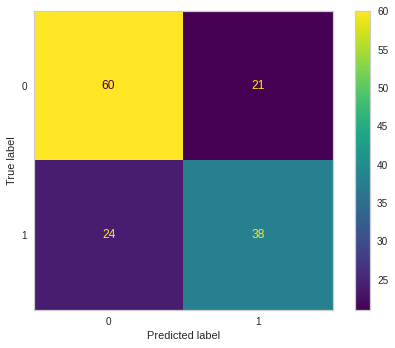

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f166a525a10>,
 None,
 None)

In [ ]:
# Cria e mostra a matriz de confusão em forma de array
cm_tree = confusion_matrix(y_true_tree, y_pred_tree)
display("Matriz de confusão", cm_tree)

# Mostra a matriz de confusão em uma matriz de calor
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot(), plt.grid(False), plt.show()

### 5.3.4 Criação visual da árvore de decisão

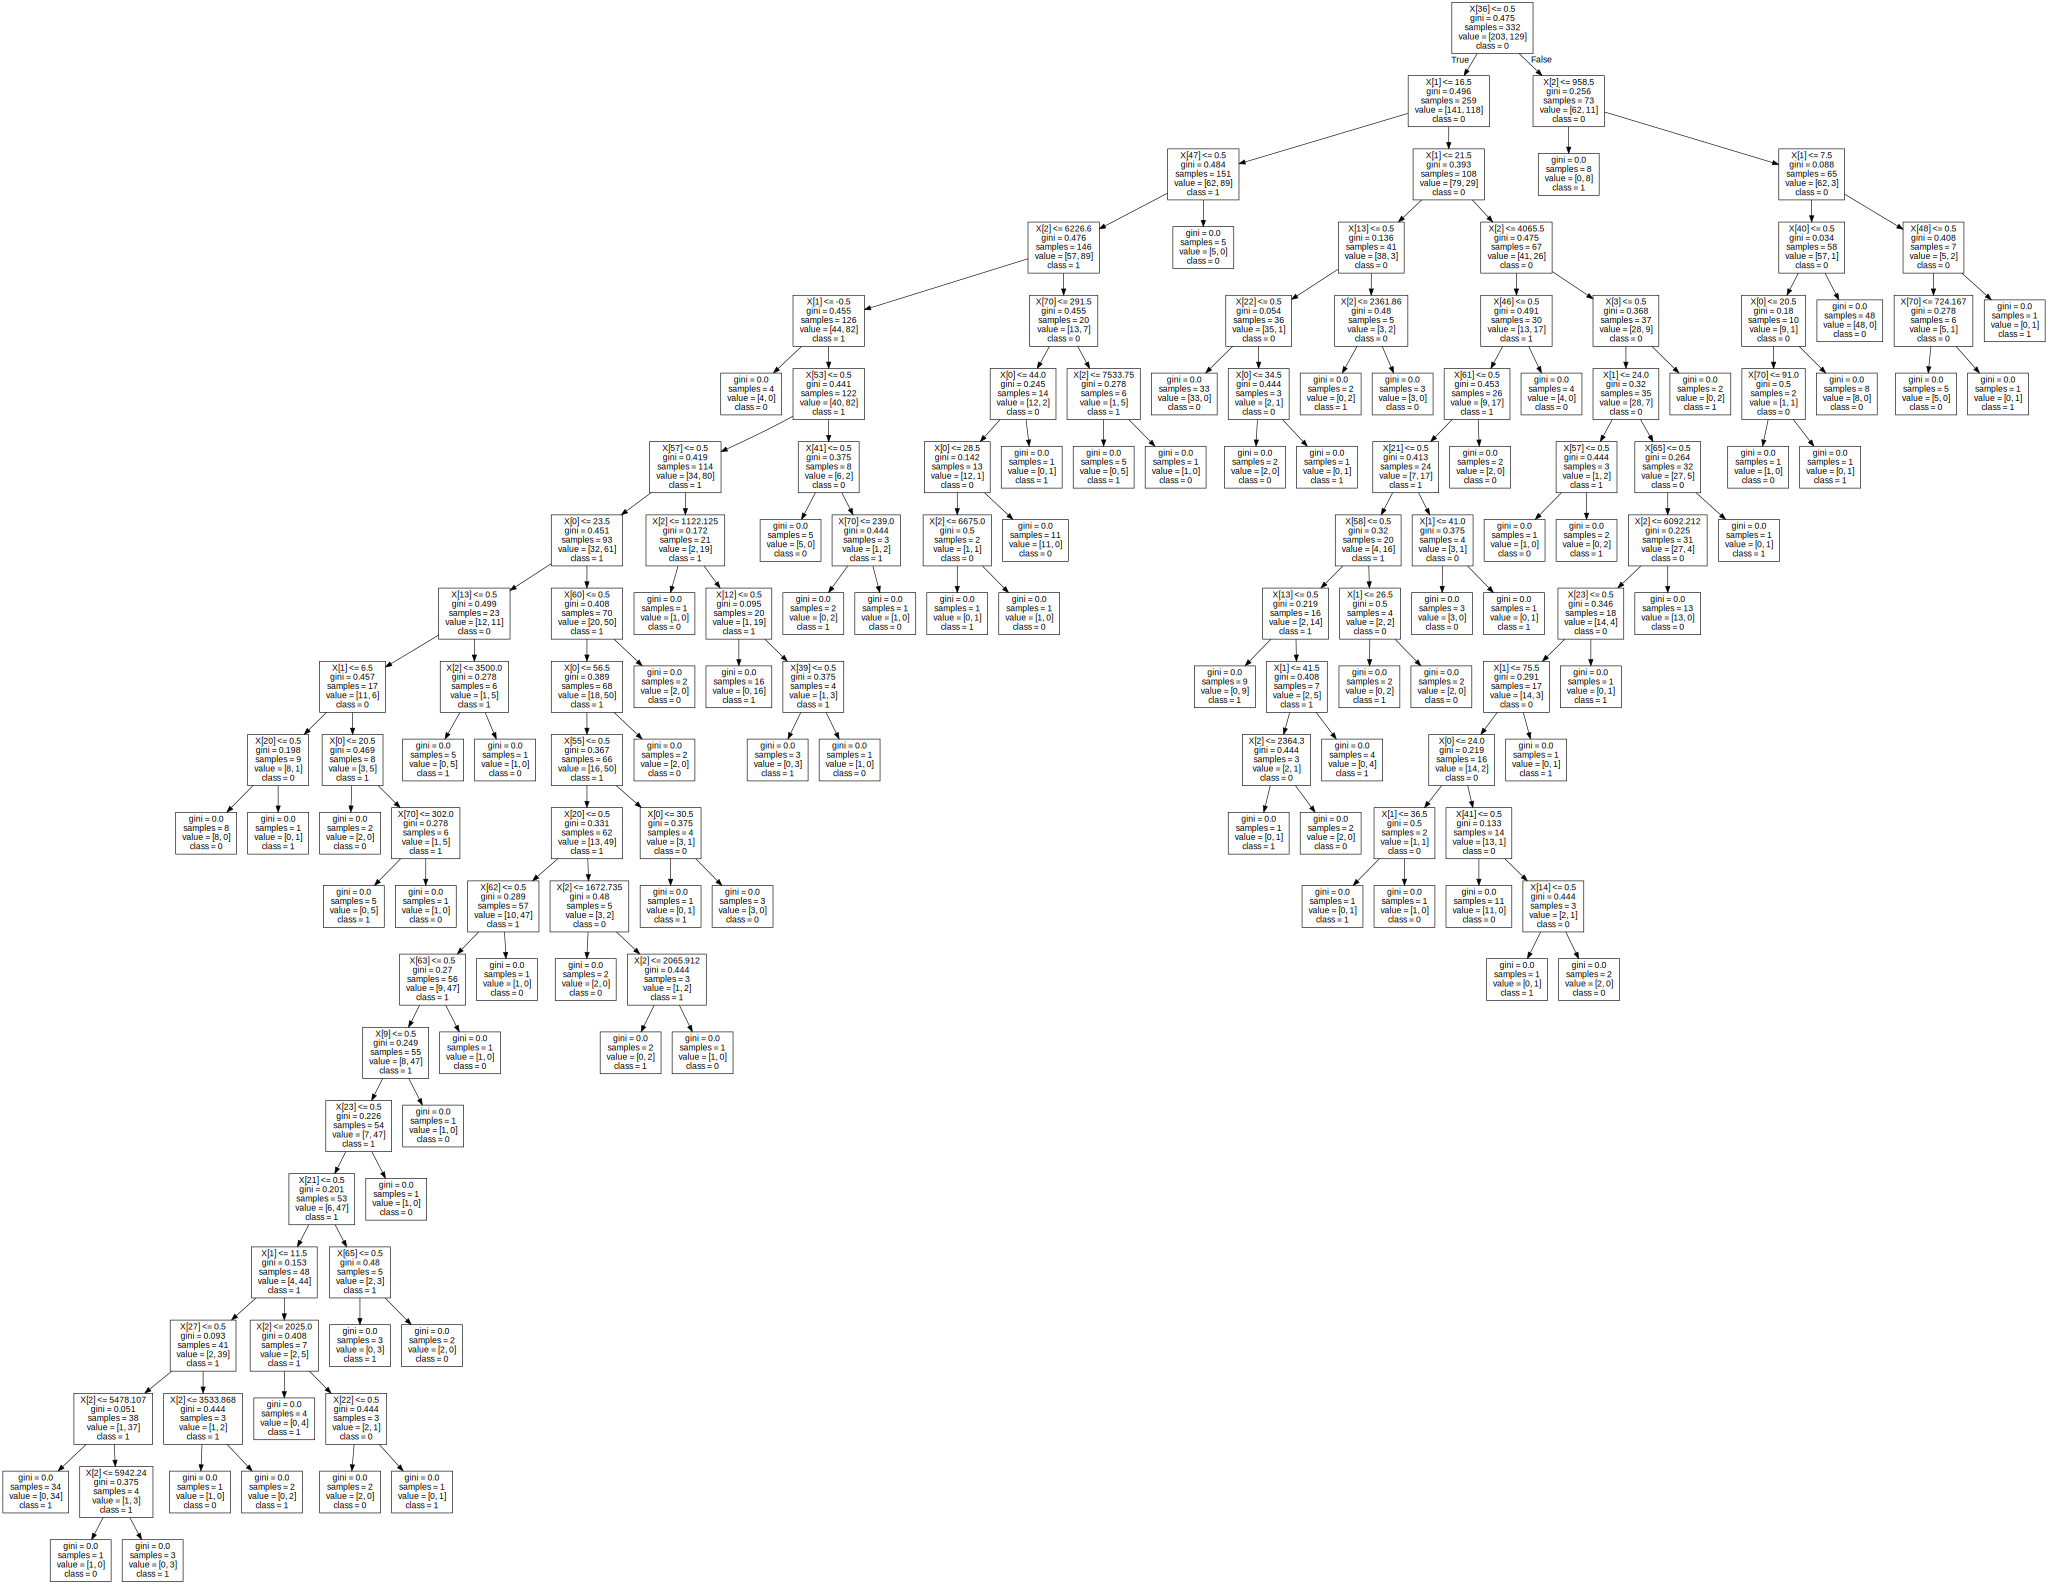

In [ ]:
# Cria a arvore de decisão em PDF e mostra em imagem também
dot_data = export_graphviz(dt, out_file=None, class_names=list(map(str, dt.classes_))) 
graph = graphviz.Source(dot_data)
graph.render('ArvoreDeDecisão.pdf')
graph

### 5.3.5 Reporte das métricas de classificação

In [ ]:
print(classification_report(y_test_tree, y_pred_tree))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73        81
           1       0.64      0.61      0.63        62

    accuracy                           0.69       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.68      0.69      0.68       143



## 5.4 RandomForest

Random Forest irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação. No RandomForest a definição desta variável não acontece com base em todas as variáveis disponíveis. O algoritmo irá escolher de maneira aleatória (random) duas ou mais variáveis, e então realizar os cálculos com base nas amostras selecionadas, para definir qual dessas variáveis será utilizada no primeiro nó.

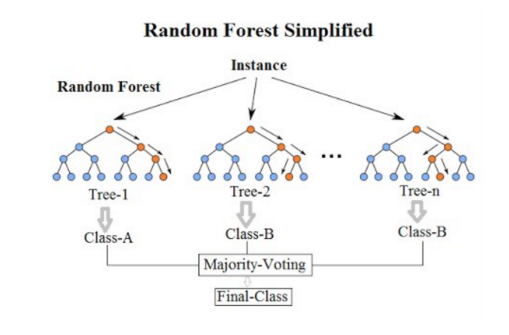

### 5.4.1 Aplicação do modelo

In [ ]:
x_rf = features
y_rf = df_everymind[['Saiu']]

# Aplicação do oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_rf_resampled, y_rf_resampled = ros.fit_resample(x_rf, y_rf)

# Dividimos entre tabela de treino e de teste

x_treino_rf, x_teste_rf, y_treino_rf, y_teste_rf = train_test_split(x_rf_resampled, y_rf_resampled, test_size = 0.3, random_state = 42)

# Analisamos o tamanho das tabelas criadas

x_teste_rf.shape, y_teste_rf.shape, x_treino_rf.shape, y_treino_rf.shape

random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest.fit(x_treino_rf, y_treino_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

### 5.4.2 Criação de visualização da matriz de confusão

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8011695906432749

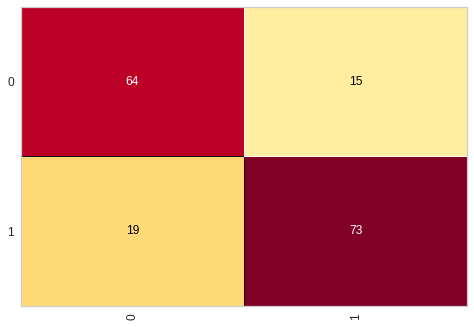

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_treino_rf, y_treino_rf)
cm.score(x_teste_rf, y_teste_rf)

### 5.4.3 Reporte das métricas de classificação

In [ ]:
previsoes_forest = random_forest.predict(x_teste_rf)
accuracy_score(y_teste_rf, previsoes_forest)

0.8011695906432749

In [ ]:
print(classification_report(y_teste_rf, previsoes_forest))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        79
           1       0.83      0.79      0.81        92

    accuracy                           0.80       171
   macro avg       0.80      0.80      0.80       171
weighted avg       0.80      0.80      0.80       171



## 5.5 Support Vector Machine

A Support Vector Machines (Máquinas de Vetores de Suporte) é um conjunto de métodos de aprendizado supervisionado usado para classificação, regressão e detecção de outliers. Uma SVM constrói um hiperplano ou conjunto deles em um espaço dimensional, que pode ser usado para classificação, regressão ou outras tarefas e distribui os dados de treino de acordo com suas classificações.

Uma separação ótima é atingida pelo hiperplano com maior distância aos dados de treinamento mais próximos de cada classe (chamados de margens funcionais), sendo todos os dados de um lado do plano classificados de uma maneira e, analogamente, os dados do outro são rotulados com outra classe.


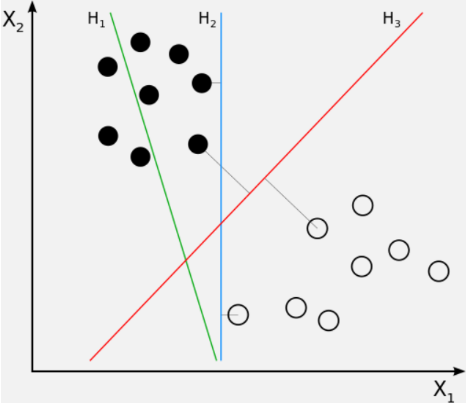

### 5.5.1 Aplicação do modelo

In [ ]:
# Dividindo x e y
x_svm = features
y_svm = df_everymind[['Saiu']]

# Aplicação do oversampling
ros = RandomOverSampler(random_state=0)
x_svm, y_svm = ros.fit_resample(x_svm, y_svm)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.3, random_state=1)

# Utilizando o algoritmo e dados de treino, preparamos o algoritmo de predição

svm_T = SVC(gamma='auto')
svm_T.fit(x_train_svm, y_train_svm.values.ravel())


SVC(gamma='auto')

### 5.5.2 Criação de visualização da matriz de confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


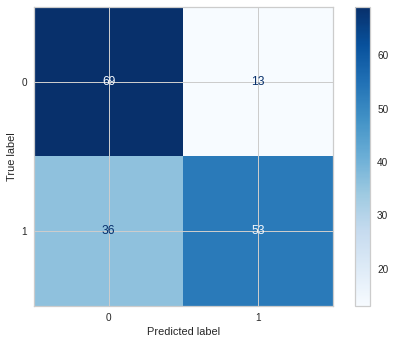

In [ ]:
plot_confusion_matrix(svm_T, x_test_svm, y_test_svm, cmap='Blues')

### 5.5.3 Reporte das métricas de classificação

In [ ]:
svm_classifier_prediction = svm_T.predict(x_test_svm)
print(accuracy_score(y_test_svm, svm_classifier_prediction))
print(classification_report(y_test_svm, svm_classifier_prediction))

0.7134502923976608
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        82
           1       0.80      0.60      0.68        89

    accuracy                           0.71       171
   macro avg       0.73      0.72      0.71       171
weighted avg       0.73      0.71      0.71       171



## 5.6 Regressão Logística

Algoritmo classificatório de aprendizado supervisionado, nesse caso regressão logística binária, que tem como função categorizar alguma variável por classes. Nesta técnica estatística de mineração de dados, a variável dependente deve ser categórica e as variáveis independentes podem ser métricas ou categóricas. O algoritmo avalia a probabilidade de tal evento ocorrer e entende como as variáveis independentes influenciam em cada evento.

Basicamente, é aplicado a transformação linear para que os valores se tornem probabilidades, então é utilizado a função logística (sigmóide) para criar uma função em ‘S’ no gráfico e classificar as variáveis.

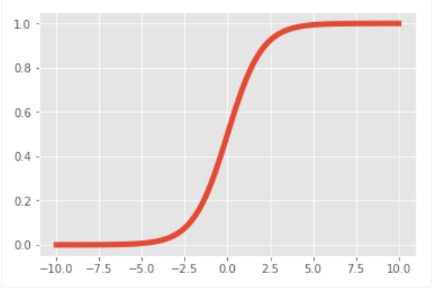


### 5.6.1 Aplicação do modelo

In [ ]:
x_rl = features
y_rl = df_everymind[['Saiu']].values.ravel()

x_rl_train, x_rl_test, y_rl_train, y_rl_test = train_test_split(x_rl, y_rl, 
                                                    test_size = 0.3, 
                                                    random_state = 6)
scaler_rl = StandardScaler()
x_rl_train = scaler_rl.fit_transform(x_rl_train)
x_rl_test = scaler_rl.transform(x_rl_test)


# Treinando o modelo
rlg = LogisticRegression(max_iter=1000)
model = rlg.fit(x_rl_train, y_rl_train)

### 5.6.2 Criação de visualização da matriz de confusão

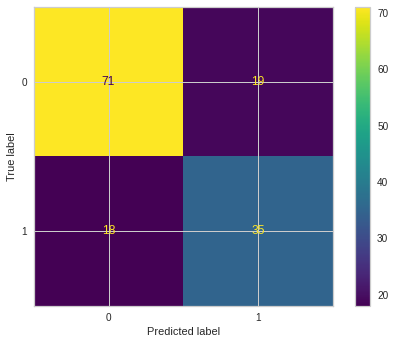

In [ ]:
y_rl_pred = model.predict(x_rl_test)
cm_lr = confusion_matrix(y_rl_test, y_rl_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                              display_labels=rlg.classes_)

disp.plot()
plt.show()

### 5.6.3 Reporte das métricas de classificação

In [ ]:
print(classification_report(y_rl_test, y_rl_pred))
print('Acuracidade (treino): ', rlg.score( x_rl_train, y_rl_train ))
print('Acuracidade (teste): ', rlg.score( x_rl_test, y_rl_test ))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        90
           1       0.65      0.66      0.65        53

    accuracy                           0.74       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.74      0.74       143

Acuracidade (treino):  0.7680722891566265
Acuracidade (teste):  0.7412587412587412


#6.Pycaret

PyCaret é uma biblioteca do Python que permite que você faça todo o ciclo da criação de um modelo de Machine Learning com poucas linhas de código.

Para nós o pycaret servira apenas para proposito de usar a funcionalidade de comparação de vários algoritmos que também faz a procura pelos melhores parâmetros. Em resumo utilizaremos para conseguir os mesmos resultados dos algoritmos em comparação com os mesmo resultados daqueles alcançados fazendo com o algoritmo de pycaret.

In [ ]:
dataset = features

In [ ]:
dataset.shape

(475, 71)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (451, 71)
Unseen Data For Predictions: (24, 71)


In [ ]:
# exp_clf101 = setup(data = data, target = 'default', session_id=123)

In [ ]:
# best_model = compare_models()

In [ ]:
# print(best_model)

#7.Hiperparâmetros e avaliação da modelagem

Os hiperparâmetros são parâmetros cujos valores controlam o processo de aprendizado e determinam os valores dos parâmetros do modelo que um algoritmo de aprendizado acaba aprendendo. Agora aplicaremos os hiperparâmetros em todos os modelos para definir os melhores para aumentar a precisão dos algoritmos.

## 7.1 K Nearest Neighbor

### 7.1.1 Aplicação e definição de hiperparâmetros

In [ ]:
parameters_knn = {
      'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      'weights': ['uniform', 'distance'],
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
      'p': [1, 2],
      'metric': ['minkowski', 'euclidean', 'manhattan'],

  }
# defining parameter range
rdm = RandomizedSearchCV(knn, parameters_knn, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
rdm_search=rdm.fit(x_knn_train, y_knn_train.squeeze())
print(rdm_search.best_params_)
y_pred_KNN = rdm.predict(x_knn_test)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'metric': 'minkowski', 'leaf_size': 70, 'algorithm': 'auto'}


### 7.1.2 Matriz de confusão e report de classificação

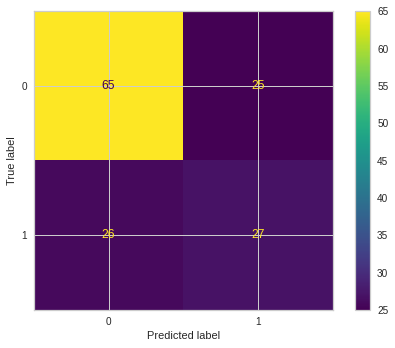

In [ ]:
cm_KNN = confusion_matrix(y_knn_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_knn_test, y_pred_KNN))


              precision    recall  f1-score   support

           0       0.71      0.72      0.72        90
           1       0.52      0.51      0.51        53

    accuracy                           0.64       143
   macro avg       0.62      0.62      0.62       143
weighted avg       0.64      0.64      0.64       143



### 7.1.3 Parâmetros de treino e teste

In [ ]:
for i in range(10,20):

  x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, 
                                                        test_size = 0.3, 
                                                        random_state = i)

    # Normalização dos dados

    # Instaciando o objeto scaler
  scaler = MinMaxScaler()

  x_knn_train = scaler.fit_transform(x_knn_train)

  x_knn_test = scaler.transform(x_knn_test)

    # Aplicação do modelo

    # Instaciação do obj Algoritmo
  knn = KNeighborsClassifier(n_neighbors=9)
    # Treino # x = Features, y = Label/Target
  knn.fit( x_knn_train, y_knn_train.squeeze() ) # squeeze() -> df para series


  y_knn_pred = knn.predict(x_knn_test)
    # probabilidade de cada classe

    # Teste de Acuracidade (accuracy)
  print(i)
  print('Acuracidade (treino): ', knn.score( x_knn_train, y_knn_train ))
  print('Acuracidade (teste): ', knn.score( x_knn_test, y_knn_test ))

10
Acuracidade (treino):  0.7319277108433735
Acuracidade (teste):  0.6363636363636364
11
Acuracidade (treino):  0.75
Acuracidade (teste):  0.5664335664335665
12
Acuracidade (treino):  0.7108433734939759
Acuracidade (teste):  0.6293706293706294
13
Acuracidade (treino):  0.7259036144578314
Acuracidade (teste):  0.6293706293706294
14
Acuracidade (treino):  0.7259036144578314
Acuracidade (teste):  0.6013986013986014
15
Acuracidade (treino):  0.6807228915662651
Acuracidade (teste):  0.6573426573426573
16
Acuracidade (treino):  0.6987951807228916
Acuracidade (teste):  0.6083916083916084
17
Acuracidade (treino):  0.7530120481927711
Acuracidade (teste):  0.6083916083916084
18
Acuracidade (treino):  0.6957831325301205
Acuracidade (teste):  0.6083916083916084
19
Acuracidade (treino):  0.6957831325301205
Acuracidade (teste):  0.6083916083916084


## 7.2 Naive Bayes

### 7.2.1 Aplicação e definição de hiperparâmetros


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params_bayes = {
'var_smoothing': [0.000000007935,0.000000008,0.0000000085,0.000000009, 0.0000000009, 0.00000000009]
}

rand_search_b = RandomizedSearchCV(estimator = GaussianNB(), param_distributions=params_bayes)
rand_search_b.fit(x_by_treino, y_by_treino.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [7.935e-09, 8e-09,
                                                          8.5e-09, 9e-09, 9e-10,
                                                          9e-11]})

In [ ]:
print(rand_search_b.best_score_)
print(rand_search_b.best_params_)

0.6774683544303797
{'var_smoothing': 7.935e-09}


### 7.2.2 Teste do modelo com os hiperparâmetros

In [ ]:
best_b = rand_search_b.best_estimator_
y_pred_b = best_b.predict(x_by_teste)

In [ ]:
print('Acc treino: ', best_b.score(x_by_treino, y_by_treino ))
print('Acc teste: ', best_b.score(x_by_teste, y_by_teste.squeeze() ))
print( 'Revocação: ', recall_score( y_by_teste, y_pred_b ))
print( 'Precisão: ', precision_score( y_by_teste, y_pred_b ))
print( 'F1_score: ', f1_score( y_by_teste, y_pred_b ))

Acc treino:  0.72544080604534
Acc teste:  0.672514619883041
Revocação:  0.8764044943820225
Precisão:  0.6341463414634146
F1_score:  0.7358490566037736


### 7.2.3 Parâmetros de treino e teste

In [ ]:
# Rodando o random state de 0 a 10, a variança foi de 10%
for i in range(10):
  x_by = features
  y_by = df_everymind[['Saiu']]

  ros = RandomOverSampler(random_state=0)

  x_by_resampled, y_by_resampled = ros.fit_resample(x_by, y_by)

  # Dividimos entre tabela de treino e de teste
  x_by_treino, x_by_teste, y_by_treino, y_by_teste = train_test_split(x_by_resampled, y_by_resampled, test_size = 0.3, random_state = i)

  scaler = MinMaxScaler()

  x_knn_train = scaler.fit_transform(x_by_treino)

  x_knn_test = scaler.transform(x_by_teste)

  naive_tipo_saida = GaussianNB()
  naive_tipo_saida.fit(x_by_teste, y_by_teste)

  previsoes = naive_tipo_saida.predict(x_by_teste)
  print(i)
  print(classification_report(y_by_teste, previsoes))

0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



              precision    recall  f1-score   support

           0       0.93      0.44      0.59        94
           1       0.58      0.96      0.73        77

    accuracy                           0.67       171
   macro avg       0.76      0.70      0.66       171
weighted avg       0.77      0.67      0.65       171

1
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        82
           1       0.65      0.93      0.77        89

    accuracy                           0.71       171
   macro avg       0.76      0.70      0.69       171
weighted avg       0.75      0.71      0.69       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        79
           1       0.70      0.92      0.79        92

    accuracy                           0.74       171
   macro avg       0.78      0.73      0.73       171
weighted avg       0.77      0.74      0.73       171

3
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        90
           1       0.59      0.93      0.72        81

    accuracy                           0.65       171
   macro avg       0.72      0.67      0.64       171
weighted avg       0.73      0.65      0.63       171

4
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        89
           1       0.65      0.94      0.77        82

    accuracy                           0.73       171
   macro avg       0.78      0.74      0.72       171
weighted avg       0.78      0.73      0.72       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        92
           1       0.69      0.90      0.78        79

    accuracy                           0.77       171
   macro avg       0.79      0.78      0.77       171
weighted avg       0.79      0.77      0.76       171

6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.92      0.48      0.63        95
           1       0.60      0.95      0.73        76

    accuracy                           0.69       171
   macro avg       0.76      0.72      0.68       171
weighted avg       0.78      0.69      0.68       171

7
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        84
           1       0.72      0.94      0.82        87

    accuracy                           0.78       171
   macro avg       0.82      0.78      0.78       171
weighted avg       0.81      0.78      0.78       171

8
              precision    recall  f1-score   support

           0       0.87      0.60      0.71        88
           1       0.68      0.90      0.78        83

    accuracy                           0.75       171
   macro avg       0.78      0.75      0.74       171
weighted avg       0.78      0.75      0.74       171

9
             

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 7.3 Árvore de decisão

### 7.3.1 Aplicação e definição de hiperparâmetros

#### 7.3.1.1 Grid Search

In [ ]:

X_grid_search_tree = features
y_grid_search_tree = df_everymind[['Saiu']]

parametros = {
	"criterion":['gini','entropy'],
	"max_depth":range(1,10),
	"min_samples_split":range(1,10),
	"min_samples_leaf":range(1,5)
}

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train_tree, y_train_tree.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7196291270918136
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


#### 7.3.1.2 Random_search

In [ ]:
X_grid_search_tree = features
y_grid_search_tree = df_everymind[['Saiu']]

parametros = {
	"criterion":['gini','entropy'],
	"max_depth":range(1,10),
	"min_samples_split":range(1,10),
	"min_samples_leaf":range(1,5)
}

random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=parametros)
random_search.fit(x_train_tree, y_train_tree.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float i

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)})

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

0.7196291270918136
{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'entropy'}


### 7.3.2 Parâmetros de treino e teste

In [ ]:
x_tree_state = features
y_tree_state = df_everymind[['Saiu']]

resultadosTrain = []
resultadosTest = []
for i in range(30,100):
  x_train_tree_state, x_test_tree_state, y_train_tree_state, y_test_tree_state = train_test_split(x_tree_state, y_tree_state, 
                                                    test_size = 0.3, 
                                                     random_state = i)
  
  dt_state = DecisionTreeClassifier(max_depth=2, criterion='entropy', min_samples_leaf=2, min_samples_split=3)
  dt_state.fit(x_train_tree_state, y_train_tree_state.squeeze())
  print('Acuracidade (treino): ', i , dt.score( x_train_tree_state, y_train_tree_state))
  print('Acuracidade (teste): ', i, dt.score( x_test_tree_state, y_test_tree_state))
  # resultadosTrain.append(dt.score(x_train_tree_state, y_train_tree_state))
  # resultadosTest.append(dt.score(x_test_tree_state, y_test_tree_state))
  # max_depth=5, criterion='entropy', min_samples_leaf=1, min_samples_split=4

Acuracidade (treino):  30 0.8945783132530121
Acuracidade (teste):  30 0.9300699300699301
Acuracidade (treino):  31 0.9126506024096386
Acuracidade (teste):  31 0.8881118881118881
Acuracidade (treino):  32 0.9006024096385542
Acuracidade (teste):  32 0.916083916083916
Acuracidade (treino):  33 0.9036144578313253
Acuracidade (teste):  33 0.9090909090909091
Acuracidade (treino):  34 0.9096385542168675
Acuracidade (teste):  34 0.8951048951048951
Acuracidade (treino):  35 0.9096385542168675
Acuracidade (teste):  35 0.8951048951048951
Acuracidade (treino):  36 0.9066265060240963
Acuracidade (teste):  36 0.9020979020979021
Acuracidade (treino):  37 0.9066265060240963
Acuracidade (teste):  37 0.9020979020979021
Acuracidade (treino):  38 0.9036144578313253
Acuracidade (teste):  38 0.9090909090909091
Acuracidade (treino):  39 0.9006024096385542
Acuracidade (teste):  39 0.916083916083916
Acuracidade (treino):  40 0.9036144578313253
Acuracidade (teste):  40 0.9090909090909091
Acuracidade (treino):  

### 7.3.3 Teste do modelo com os de parâmetros de treino e teste

In [ ]:
# Definindo X (Feaures utilizadas) e Y (Resposta de Saída ou Permanencia em SIM(1) ou NÃO(0))
x_tree_tst = features
y_tree_tst = df_everymind[['Saiu']]

# ros_tree = RandomOverSampler(random_state=0)
# x_resampled_tree, y_resampled_tree = ros_tree.fit_resample(x_tree_tst, y_tree_tst)

# Separa treino e teste, definindo porcentagem de separação e random_state
x_train_tree_tst, x_test_tree_tst, y_train_tree_tst, y_test_tree_tst = train_test_split(x_tree_tst, y_tree_tst, 
                                                    test_size = 0.3, 
                                                     random_state = 72)

# Mostra os tamanhos do X e Y de treino e teste
print("Tamanho do X treino:", x_train_tree_tst.shape)
print("Tamanho do Y treino:", y_train_tree_tst.shape)
print("Tamanho do X teste:", x_test_tree_tst.shape)
print("Tamanho do Y teste:", y_test_tree_tst.shape)

# Rodando o modelo de Decision Tree
dt_tst = DecisionTreeClassifier(max_depth=2, criterion='entropy', min_samples_leaf=2, min_samples_split=3)
dt_tst.fit(x_train_tree, y_train_tree.squeeze())

# Mostrando o resultado do modelo
print('Acuracidade (treino): ', dt.score( x_train_tree_tst, y_train_tree_tst ))
print('Acuracidade (teste): ', dt.score( x_test_tree_tst, y_test_tree_tst ))

Tamanho do X treino: (332, 71)
Tamanho do Y treino: (332, 1)
Tamanho do X teste: (143, 71)
Tamanho do Y teste: (143, 1)
Acuracidade (treino):  0.8674698795180723
Acuracidade (teste):  0.993006993006993


'Matriz de confusão'

array([[82,  0],
       [ 1, 60]])

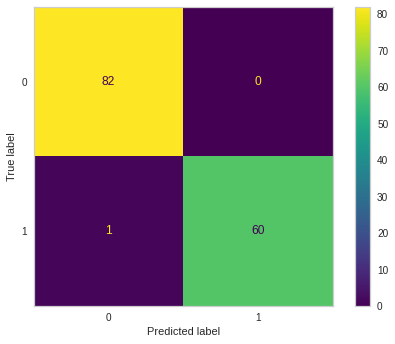

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f1667703850>,
 None,
 None)

In [ ]:
# Armazenando em uma variavel as predições do resultado de teste
y_pred_tree_tst = dt.predict(x_test_tree_tst)

# Armazenando em uma variavel os resultados corretos do teste
y_true_tree_tst = y_test_tree_tst

# Cria e mostra a matriz de confusão em forma de array
cm_tree_tst = confusion_matrix(y_true_tree_tst, y_pred_tree_tst)
display("Matriz de confusão", cm_tree_tst)

# Mostra a matriz de confusão em uma matriz de calor
disp_tree_tst = ConfusionMatrixDisplay(confusion_matrix=cm_tree_tst)
disp_tree_tst.plot(), plt.grid(False), plt.show()

## 7.4 RandomForest

### 7.4.1 Aplicação e definição de hiperparâmetros

In [ ]:
from sklearn.ensemble import RandomForestRegressor
params = {
'n_estimators': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 'min_samples_split':  [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'max_depth':  [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 'bootstrap': [True, False]
}

In [ ]:
rand_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=params)
rand_search.fit(x_treino_rf, y_treino_rf.squeeze())

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 5, 10, 20, 30, 40,
                                                      50, 60, 70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 5, 10, 20, 30,
                                                         40, 50, 60, 70, 80,
                                                         90]})

In [ ]:
print(rand_search.best_score_)
print(rand_search.best_params_)

0.7783544303797467
{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


### 7.4.2 Teste do modelo com os hiperparâmetros

In [ ]:
best_rand = rand_search.best_estimator_
y_pred_rand = best_rand.predict(x_teste_rf)

In [ ]:
print('Acc treino: ', best_rand.score(x_treino_rf, y_treino_rf ))
print('Acc teste: ', best_rand.score(x_teste_rf, y_teste_rf.squeeze() )) 
print( 'Revocação: ', recall_score( y_teste_rf, y_pred_rand ))
print( 'Precisão: ', precision_score( y_teste_rf, y_pred_rand ))
print( 'F1_score: ', f1_score( y_teste_rf, y_pred_rand ))

Acc treino:  0.9949622166246851
Acc teste:  0.7953216374269005
Revocação:  0.8369565217391305
Precisão:  0.7938144329896907
F1_score:  0.8148148148148148


### 7.4.3 Parâmetros de treino e teste

In [ ]:
# Rodando o random state de 0 a 10 a variança da acurácia foi de 7%
for i in range(10):
  x_rf = features
  y_rf = df_everymind[['Saiu']]

  from imblearn.over_sampling import RandomOverSampler
  ros = RandomOverSampler(random_state=0)

  x_rf_resampled, y_rf_resampled = ros.fit_resample(x_rf, y_rf)


  x_treino_rf, x_teste_rf, y_treino_rf, y_teste_rf = train_test_split(x_rf_resampled, y_rf_resampled, test_size = 0.3, random_state = i)

  from sklearn.preprocessing import MinMaxScaler

  # Instaciando o objeto scaler
  scaler = MinMaxScaler()

  x_knn_train = scaler.fit_transform(x_treino_rf)

  x_knn_test = scaler.transform(x_teste_rf)
  random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
  random_forest.fit(x_treino_rf, y_treino_rf)


  previsoes_forest = random_forest.predict(x_teste_rf)
  print(i)
  print(classification_report(y_teste_rf, previsoes_forest))


0
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        94
           1       0.70      0.88      0.78        77

    accuracy                           0.78       171
   macro avg       0.79      0.79      0.78       171
weighted avg       0.80      0.78      0.78       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1
              precision    recall  f1-score   support

           0       0.90      0.63      0.74        82
           1       0.73      0.93      0.82        89

    accuracy                           0.79       171
   macro avg       0.82      0.78      0.78       171
weighted avg       0.81      0.79      0.78       171

2
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        79
           1       0.77      0.82      0.79        92

    accuracy                           0.77       171
   macro avg       0.77      0.77      0.77       171
weighted avg       0.77      0.77      0.77       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        90
           1       0.75      0.68      0.71        81

    accuracy                           0.74       171
   macro avg       0.74      0.74      0.74       171
weighted avg       0.74      0.74      0.74       171

4
              precision    recall  f1-score   support

           0       0.78      0.73      0.76        89
           1       0.73      0.78      0.75        82

    accuracy                           0.75       171
   macro avg       0.76      0.76      0.75       171
weighted avg       0.76      0.75      0.75       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        92
           1       0.77      0.84      0.80        79

    accuracy                           0.81       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.81      0.81      0.81       171

6
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        95
           1       0.66      0.83      0.73        76

    accuracy                           0.73       171
   macro avg       0.74      0.74      0.73       171
weighted avg       0.75      0.73      0.73       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        84
           1       0.80      0.78      0.79        87

    accuracy                           0.79       171
   macro avg       0.79      0.79      0.79       171
weighted avg       0.79      0.79      0.79       171

8
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        88
           1       0.76      0.83      0.79        83

    accuracy                           0.79       171
   macro avg       0.79      0.79      0.79       171
weighted avg       0.79      0.79      0.79       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        83
           1       0.75      0.86      0.80        88

    accuracy                           0.78       171
   macro avg       0.79      0.78      0.78       171
weighted avg       0.78      0.78      0.78       171



## 7.5 Support Vector Machine

### 7.5.1 Aplicação e definição de hiperparâmetros

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, test_size=0.3, random_state=6)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Definição dos parâmetros úteis para ajuste de hiperparâmetros
svc = SVC(gamma='auto')
parameters_svm = {
      'C': [0.1, 1, 10, 100, 1000],
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      'kernel': ['rbf', 'linear', 'sigmoid'],
      # 'n_iter': [30,50,100],
      # 'coef0': [0.1, 0.5, 1, 2, 5, 10],
      # 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      # 'shrinking': [True, False],
      # 'probability': [True, False],
      # 'tol': [0.001, 0.0001, 0.00001],
      # 'cache_size': [200, 400, 600, 800, 1000],
      # 'class_weight': ['balanced', None],
      # 'max_iter': [-1, 1000, 2000, 3000, 4000, 5000],
      # 'decision_function_shape': ['ovo', 'ovr'],
      # 'random_state': [i],
      # 'break_ties': [True, False],
      # 'precomputed': [True, False]
}

##### 7.5.1.1 GridSearchCV

In [ ]:
# Otimização da escolha dos hiperparâmetros usando GridSearchCV - CODIGO ABAIXO COMENTADO POR DEMORAR NA EXECUÇÃO DA CELULA

# clf = GridSearchCV(svc, parameters_svm, cv=5)
# clf.fit(x_train, y_train.values.ravel())

##### 7.5.1.2 RandomizedSearchCV

In [ ]:
# Otimização da escolha dos hiperparâmetros usando RandomizedSearchCV

rs = RandomizedSearchCV(svc, parameters_svm, cv=5, return_train_score = False)
rs.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'sigmoid']})

### 7.5.2 Parâmetros de treino e teste

Acurácia média usando SVM: 0.7033756007179668
Acurácia máxima usando SVM: 0.8070175438596491
Acurácia mínima usando SVM: 0.6140350877192983
Variância: 0.0011357434254162914
              precision    recall  f1-score   support

           0       0.74      0.62      0.68        80
           1       0.71      0.80      0.75        91

    accuracy                           0.72       171
   macro avg       0.72      0.71      0.71       171
weighted avg       0.72      0.72      0.72       171



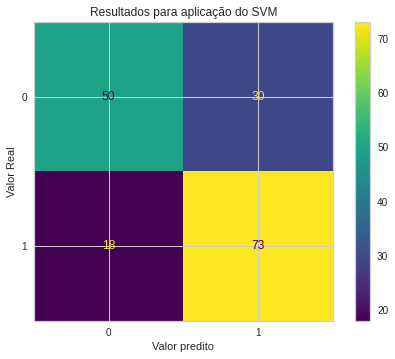

In [ ]:
svm_best_param = []

for i in range(0, 101):
  x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, test_size=0.3, random_state=i)
    
  # Aplicação das métricas de padronização e normalização

  #scaler_minmax = MinMaxScaler()
  #x_train = scaler_minmax.fit_transform(x_train)
  #x_test = scaler_minmax.transform(x_test)
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)

  svm_T = SVC(gamma='auto')
  svm_T.fit(x_train, y_train.values.ravel())
  svm_best_param.append(svm_T.score(x_test, y_test.values.ravel()))

# Resultado da predição do svm usando dados de teste

print("Acurácia média usando SVM: " +  str(np.mean(svm_best_param)))
print("Acurácia máxima usando SVM: " + str(np.amax(svm_best_param)))
print("Acurácia mínima usando SVM: " + str(np.amin(svm_best_param)))
print("Variância: " + str(np.var(svm_best_param)))

x_pred_svm = svm_T.predict(x_test)

print(classification_report(y_test, x_pred_svm))

cm = confusion_matrix(y_test, x_pred_svm)

# versão visual da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=svm_T.classes_)

disp.plot()
plt.xlabel('Valor predito') 
plt.ylabel('Valor Real') 
plt.title("Resultados para aplicação do SVM")
plt.show()

### 7.5.3 Teste do modelo com os de parâmetros de treino e teste

Melhor acurácia com RandomizedSearchCV: 0.7329746835443038
Melhores parâmetros: {'kernel': 'rbf', 'gamma': 1, 'C': 100}
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        80
           1       0.97      0.82      0.89        91

    accuracy                           0.89       171
   macro avg       0.90      0.90      0.89       171
weighted avg       0.91      0.89      0.89       171



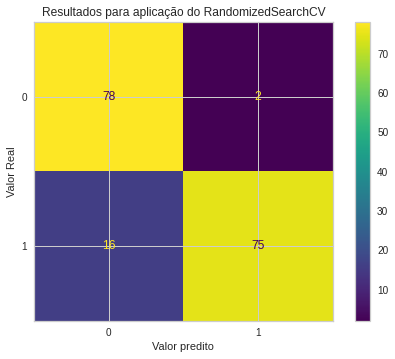

In [ ]:
# ------------------------------------------------------------------------------

# Resultado da predição do svm com GridSearchCV usando dados de teste - CODIGO ABAIXO COMENTADO POR DEMORAR NA EXECUÇÃO DA CELULA
# print("Melhores com GridSearchCV: " + str(clf.best_score_))
# print("Melhores parâmetros: " + str(clf.best_params_))

# x_pred_grid = clf.predict(x_test)

# print(classification_report(y_test, x_pred_grid))

# cm_grid = confusion_matrix(y_test, x_pred_grid)

# # versão visual da matriz
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid, 
#                              display_labels=clf.classes_)

# disp.plot()
# plt.xlabel('Valor predito') 
# plt.ylabel('Valor Real') 
# plt.title("Resultados para aplicação do GridSearchCV")
# plt.show()

# ------------------------------------------------------------------------------

# Resultado da predição do svm com RandomizedSearchCV usando dados de teste
print("Melhor acurácia com RandomizedSearchCV: " + str(rs.best_score_))
print("Melhores parâmetros: " + str(rs.best_params_))

x_pred_random = rs.predict(x_test)

print(classification_report(y_test, x_pred_random))

cm_random = confusion_matrix(y_test, x_pred_random)

# versão visual da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random, 
                             display_labels=rs.classes_)

disp.plot()
plt.xlabel('Valor predito') 
plt.ylabel('Valor Real') 
plt.title("Resultados para aplicação do RandomizedSearchCV")
plt.show()

## 7.6 Regressão Logística

### 7.6.1 Aplicação e definição de hiperparâmetros

In [ ]:
x_rl_par = features
y_rl_par = df_everymind[['Saiu']].values.ravel()

x_rl_train_par, x_rl_test_par, y_rl_train_par, y_rl_test_par = train_test_split(x_rl_par, y_rl_par, 
                                                    test_size = 0.3, 
                                                    random_state = 6)
scaler_rl_par = StandardScaler()
x_rl_train_par = scaler_rl_par.fit_transform(x_rl_train_par)
x_rl_test_par = scaler_rl_par.transform(x_rl_test_par)

# Treinando o modelo
rlg_par = LogisticRegression(max_iter=1000)
model_par = rlg_par.fit(x_rl_train_par, y_rl_train_par)
#max_iter=1000
# Fazendo as predições
y_rl_pred_par = model_par.predict(x_rl_test)

model_par = LogisticRegression(max_iter=1000)
parameters_par = {
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [100, 10, 1.0, 0.1, 0.01],
              'penalty': ['elasticnet', 'l1', 'l2']
              }

In [ ]:
randm_src_par = RandomizedSearchCV(estimator=model, param_distributions = parameters_par,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src_par.fit(x_rl_train_par, y_rl_train_par)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src_par.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src_par.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src_par.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.1, max_iter=1000, solver='saga')

 The best score across ALL searched params:
 0.6475903614457831

 The best parameters across ALL searched params:
 {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver s

### 7.6.2 Matriz de confusão e report de classificação

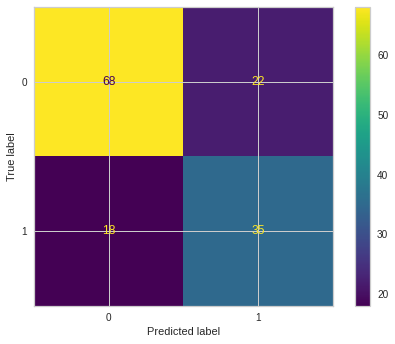

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        90
           1       0.61      0.66      0.64        53

    accuracy                           0.72       143
   macro avg       0.70      0.71      0.70       143
weighted avg       0.73      0.72      0.72       143

Acuracidade (treino):  0.7590361445783133
Acuracidade (teste):  0.7202797202797203


In [ ]:
best_rl_par = randm_src_par.best_estimator_
y_rl_pred_H_par = best_rl_par.predict(x_rl_test)

cm_lr_hy_par = confusion_matrix(y_rl_test_par, y_rl_pred_H_par)
disp_par = ConfusionMatrixDisplay(confusion_matrix=cm_lr_hy_par, 
                              display_labels=rlg.classes_)
disp_par.plot()
plt.show()

print(classification_report(y_rl_test_par, y_rl_pred_H_par))
print('Acuracidade (treino): ', best_rl_par.score( x_rl_train, y_rl_train ))
print('Acuracidade (teste): ', best_rl_par.score( x_rl_test, y_rl_test ))

### 7.6.3 Parâmetros de treino e teste

In [ ]:
for i in range(10):
  x_rl_train, x_rl_test, y_rl_train, y_rl_test = train_test_split(x_rl, y_rl, 
                                                      test_size = 0.3, 
                                                      random_state = i)
  scaler_rl = StandardScaler()
  x_rl_train = scaler_rl.fit_transform(x_rl_train)
  x_rl_test = scaler_rl.transform(x_rl_test)


  # Treinando o modelo
  rlg = LogisticRegression(max_iter=1000)
  model = rlg.fit(x_rl_train, y_rl_train)
  #max_iter=1000
  # Fazendo as predições
  y_rl_pred = model.predict(x_rl_test)
  print(i)
  print('Acuracidade (treino): ', rlg.score( x_rl_train, y_rl_train ))
  print('Acuracidade (teste): ', rlg.score( x_rl_test, y_rl_test ))

0
Acuracidade (treino):  0.7981927710843374
Acuracidade (teste):  0.6783216783216783
1
Acuracidade (treino):  0.822289156626506
Acuracidade (teste):  0.6293706293706294
2
Acuracidade (treino):  0.7831325301204819
Acuracidade (teste):  0.6853146853146853
3
Acuracidade (treino):  0.8072289156626506
Acuracidade (teste):  0.6993006993006993
4
Acuracidade (treino):  0.8253012048192772
Acuracidade (teste):  0.7132867132867133
5
Acuracidade (treino):  0.822289156626506
Acuracidade (teste):  0.7412587412587412
6
Acuracidade (treino):  0.7680722891566265
Acuracidade (teste):  0.7412587412587412
7
Acuracidade (treino):  0.7801204819277109
Acuracidade (teste):  0.6993006993006993
8
Acuracidade (treino):  0.8162650602409639
Acuracidade (teste):  0.6643356643356644
9
Acuracidade (treino):  0.8042168674698795
Acuracidade (teste):  0.7692307692307693


#8.Conclusão dos modelos

Principais e melhores resultados do seu projeto e recomendações formais sobre o uso do modelo.

## 8.1 Melhor algoritmo e métricas de classificação

Depois de todos os testes dos algoritmos, foi observado que a acuracia da árvore de decisão varia de 97% a 98%. As metricas de avaliação segue abaixo:


*   Acuracidade (treino):  0.8734939759036144
*   Acuracidade (teste):  0.986013986013986

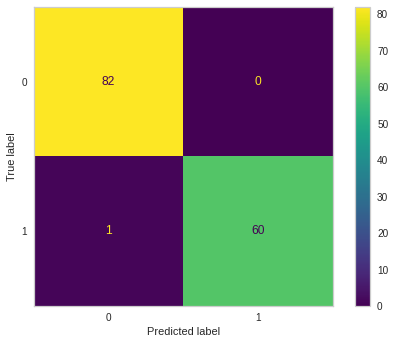

